In [7]:
import warnings
import sys
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import math #needed for definition of pi

np.set_printoptions(precision=3, suppress=True, linewidth=100)

In [13]:
class TailMultLat(object):
    def __init__(self, latsPath, qps,binRange):
        self.reqTimes = np.empty([0,0])
        # for idx in [1,2,3,4,5,6,7,8]:
        for idx in binRange:
            fileName = join(latsPath,qps)+"/lats-"+str(idx)+".bin"
            # print("looking for: ", fileName)
            # fileName = join(latsPath,'lats.bin')
            if os.path.exists(fileName):
                f = open(fileName, 'rb')
                a = np.fromfile(f, dtype=np.uint64) # a will be 1-D array of all data
                # self.reqTimes = np.append(self.reqTimes, a[600:29400], axis=None)
                self.reqTimes = np.append(self.reqTimes, a[:], axis=None)
                # self.reqTimes = np.append(self.reqTimes, a, axis=None)
                # np.append(self.reqTimes, a.reshape((a.shape[0]//3, 3)), axis=None)
                # self.reqTimes = a.reshape((a.shape[0]//3, 3)) # transfer into 2-D array
                f.close()
            else:
                print("not found in this dir :", fileName)
        
        self.reqTimes = self.reqTimes.reshape((self.reqTimes.shape[0]//3, 3))


    def parseQueueTimes(self):
        return self.reqTimes[:, 0]

    def parseSvcTimes(self):
        return self.reqTimes[:, 1]

    def parseSojournTimes(self):
        return self.reqTimes[:, 2]
    
    # def parseSpinTimes(self):
    #     return self.reqTimes[:, 3]

def getTailMultLatPct(latsFolder,qps,binRange):
    # print(latsFolder)
    assert os.path.exists(latsFolder)

    latsObj = TailMultLat(latsFolder,qps,binRange)

    qTimes = [l/1e6 for l in latsObj.parseQueueTimes()]
    svcTimes = [l/1e6 for l in latsObj.parseSvcTimes()]
    sjrnTimes = [l/1e6 for l in latsObj.parseSojournTimes()]
    # spinTimes = latsObj.parseSpinTimes()
    f = open('lats.txt','w')

    f.write('%12s | %12s | %12s \n\n' \
            % ('QueueTimes', 'ServiceTimes', 'SojournTimes'))

    for (q, svc, sjrn) in zip(qTimes, svcTimes, sjrnTimes):
        f.write("%12s | %12s | %12s \n" \
                % ('%.3f' % q, '%.3f' % svc, '%.3f' % sjrn))
    f.close()
    sjrn95th = stats.scoreatpercentile(sjrnTimes, 95)
    sjrn99th = stats.scoreatpercentile(sjrnTimes, 99)
    sjrnMean = stats.tmean(sjrnTimes)
    sjrnMax = max(sjrnTimes)
    sjrn95Mean = stats.tmean(sjrnTimes, (sjrn95th, sjrnMax))
    sjrn99Mean = stats.tmean(sjrnTimes, (sjrn99th, sjrnMax))

    svc95th = stats.scoreatpercentile(svcTimes, 95)
    svc99th = stats.scoreatpercentile(svcTimes, 99)
    svcMean = stats.tmean(svcTimes)
    svcMax = max(svcTimes)
    svc95Mean = stats.tmean(svcTimes, (svc95th, svcMax))
    svc99Mean = stats.tmean(svcTimes, (svc99th, svcMax))

    # print(np.asarray([sjrnMean, sjrn95Mean, sjrn99Mean, svcMean, svc95Mean, svc99Mean, svc95th, svc99th]))
    return np.asarray([sjrnMean, sjrn95Mean, sjrn99Mean, svcMean, svc95Mean, svc99Mean, svc95th, svc99th])
    # return np.asarray([sjrnMean, sjrn95th, sjrn99th, svcMean, svc95th, svc99th])

def combineTailFolder(latsFolder, qps, binRange):
    results = np.empty((len(qps), 8))
    rdx = 0
    for f in qps:
        results[rdx]=getTailMultLatPct(latsFolder,f, binRange)
        rdx = rdx + 1
    swaped = np.swapaxes(results,0,1)
    np.set_printoptions(precision=3)

    return swaped


In [14]:
class MicroMultLat(object):
    def __init__(self, latsPath, qps,binRange):
        self.reqTimes = np.empty([0,0])
        for idx in binRange:
        # for idx in [1]: 
            fileName = join(latsPath,qps)+"/lats-"+str(idx)+".bin"
            # print("looking for: ", fileName)
            # fileName = join(latsPath,'lats.bin')
            if os.path.exists(fileName):
                f = open(fileName, 'rb')
                a = np.fromfile(f, dtype=np.uint64) # a will be 1-D array of all data
                self.reqTimes = np.append(self.reqTimes, a[:], axis=None)
                # self.reqTimes = np.append(self.reqTimes, a, axis=None)
                # np.append(self.reqTimes, a.reshape((a.shape[0]//3, 3)), axis=None)
                # self.reqTimes = a.reshape((a.shape[0]//3, 3)) # transfer into 2-D array
                f.close()
            else:
                print("not found in this dir :", fileName)
        
        self.reqTimes = self.reqTimes.reshape((self.reqTimes.shape[0]//4, 4))


    def parseQueueTimes(self):
        return self.reqTimes[:, 0]

    def parseSvcTimes(self):
        return self.reqTimes[:, 1]

    def parseSojournTimes(self):
        return self.reqTimes[:, 2]
    
    # def parseSpinTimes(self):
    #     return self.reqTimes[:, 3]

def getMicroMultLatPct(latsFolder,qps,binRange):
    # print(latsFolder)
    assert os.path.exists(latsFolder)

    latsObj = MicroMultLat(latsFolder,qps,binRange)

    qTimes = [l/1e6 for l in latsObj.parseQueueTimes()]
    svcTimes = [l/1e6 for l in latsObj.parseSvcTimes()]
    sjrnTimes = [l/1e6 for l in latsObj.parseSojournTimes()]
    # spinTimes = latsObj.parseSpinTimes()
    f = open('lats.txt','w')

    f.write('%12s | %12s | %12s \n\n' \
            % ('QueueTimes', 'ServiceTimes', 'SojournTimes'))

    for (q, svc, sjrn) in zip(qTimes, svcTimes, sjrnTimes):
        f.write("%12s | %12s | %12s \n" \
                % ('%.3f' % q, '%.3f' % svc, '%.3f' % sjrn))
    f.close()
    sjrn95th = stats.scoreatpercentile(sjrnTimes, 95)
    sjrn99th = stats.scoreatpercentile(sjrnTimes, 99)
    sjrnMean = stats.tmean(sjrnTimes)
    sjrnMax = max(sjrnTimes)
    sjrn95Mean = stats.tmean(sjrnTimes, (sjrn95th, sjrnMax))
    sjrn99Mean = stats.tmean(sjrnTimes, (sjrn99th, sjrnMax))

    svc95th = stats.scoreatpercentile(svcTimes, 95)
    svc99th = stats.scoreatpercentile(svcTimes, 99)
    svcMean = stats.tmean(svcTimes)
    svcMax = max(svcTimes)
    svc95Mean = stats.tmean(svcTimes, (svc95th, svcMax))
    svc99Mean = stats.tmean(svcTimes, (svc99th, svcMax))

    return np.asarray([sjrnMean, sjrn95Mean, sjrn99Mean, svcMean, svc95Mean, svc99Mean, svc95th, svc99th])
    # return np.asarray([sjrnMean, sjrn95th, sjrn99th, svcMean, svc95th, svc99th])

def combineMicroFolder(latsFolder, qps, binRange):
    results = np.empty((len(qps), 8))
    rdx = 0
    for f in qps:
        results[rdx]=getMicroMultLatPct(latsFolder,f, binRange)
        rdx = rdx + 1
    swaped = np.swapaxes(results,0,1)
    np.set_printoptions(precision=3)

    return swaped


[[   2.65 ,   2.668,   2.327,   2.739,   2.857,   3.871,   3.645,   4.424,  16.404, 111.253,
   142.292, 734.349,1823.434],
 [  11.178,  11.246,   9.842,  10.904,  12.422,  16.019,  19.386,  18.871, 198.202, 867.12 ,
  1016.987,1527.646,5335.374],
 [  17.787,  18.117,  18.928,  17.713,  22.12 ,  26.81 ,  36.278,  33.026, 360.432,1266.434,
  1922.842,2253.145,5707.815],
 [   0.679,   0.688,   0.694,   0.698,   0.679,   0.66 ,   0.651,   0.652,   0.655,   0.669,
     0.651,   0.646,   0.668],
 [   0.936,   0.961,   0.974,   0.992,   0.975,   0.911,   0.823,   0.846,   0.904,   1.114,
     0.869,   0.781,   1.137],
 [   1.358,   1.382,   1.392,   1.411,   1.401,   1.336,   1.271,   1.306,   1.36 ,   1.661,
     1.581,   1.175,   1.547],
 [   0.788,   0.824,   0.834,   0.845,   0.827,   0.75 ,   0.686,   0.687,   0.726,   0.734,
     0.678,   0.676,   0.712],
 [   0.902,   0.932,   0.944,   0.973,   0.958,   0.908,   0.805,   0.845,   0.92 ,   1.484,
     0.761,   0.698,   1.212]]
[[   1.7

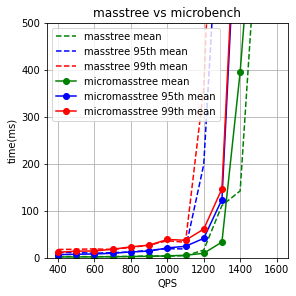

In [16]:
plt.rcParams['figure.figsize'] = [4, 4]
fig, ax00 = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
bin_range=[1,2,3,4,5,6,7,8]
masstree_dir = "/home/zohan/tailbench/results/masstree-2"
# masstree_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run10"
masstree_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_data = combineTailFolder(masstree_dir,masstree_qps,bin_range)
print(np.array2string(masstree_data[:,:], separator=','))
labels2 = list(int(i) for i in masstree_qps)

# microbench_dir = "/home/zohan/microbench/result-dist/38000-2-900-600"
microbench_dir = "/home/zohan/microbench/result-micromasstree-2"
microbench_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
# microbench_qps = ("400","600","800","1000","1200","1400","1600")
microbench_data = combineMicroFolder(microbench_dir,microbench_qps,bin_range)
microlabels = list(int(i) for i in microbench_qps)
print(np.array2string(microbench_data[:,:], separator=','))

ax00.plot(labels2, masstree_data[0], '--', color='g', label='masstree mean')
ax00.plot(labels2, masstree_data[1], '--', color='b', label='masstree 95th mean')
ax00.plot(labels2, masstree_data[2], '--', color='r',  label='masstree 99th mean')

ax00.plot(microlabels, microbench_data[0], 'o-', color='g', label='micromasstree mean')
ax00.plot(microlabels, microbench_data[1], 'o-', color='b', label='micromasstree 95th mean')
ax00.plot(microlabels, microbench_data[2], 'o-', color='r', label='micromasstree 99th mean')

ax00.legend(loc='upper left')

ax00.set_ylim(0, 500)
ax00.set_ylabel('time(ms)')
ax00.set_xlabel('QPS')
ax00.set_title('masstree vs microbench')


ax00.grid(True)
plt.show()

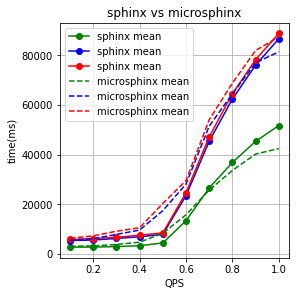

In [63]:
plt.rcParams['figure.figsize'] = [4, 4]
fig, ax00 = plt.subplots(ncols=1, nrows=1, constrained_layout=True)
bin_range=[1,2,3,4,5,6,7,8]
sphinx_dir = "/home/zohan/tailbench/results/sphinx-2"
# sphinx_qps = ("0.1","0.2","0.4","0.6","0.8","1.0")
sphinx_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
sphinx_data = combineTailFolder(sphinx_dir,sphinx_qps,bin_range)
# print(np.array2string(sphinx_data[:,:], separator=','))
sphinxlabels = list(float(i) for i in sphinx_qps)

microsphinx_dir = "/home/zohan/microbench/result-microsphinx-2"
# microsphinx_qps = ("0.1","0.2","0.4","0.6","0.8","1.0")
microsphinx_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
microsphinx_data = combineMicroFolder(microsphinx_dir,microsphinx_qps,bin_range)
microsphinxlabels = list(float(i) for i in microsphinx_qps)
# print(np.array2string(microsphinx_data[:,:], separator=','))

ax00.plot(sphinxlabels, sphinx_data[0], 'o-', color='g', label='sphinx mean')
ax00.plot(sphinxlabels, sphinx_data[1], 'o-', color='b', label='sphinx mean')
ax00.plot(sphinxlabels, sphinx_data[2], 'o-', color='r',  label='sphinx mean')

ax00.plot(microsphinxlabels, microsphinx_data[0], '--', color='g', label='microsphinx mean')
ax00.plot(microsphinxlabels, microsphinx_data[1], '--', color='b', label='microsphinx mean')
ax00.plot(microsphinxlabels, microsphinx_data[2], '--', color='r', label='microsphinx mean')

ax00.legend(loc='upper left')
ax00.legend(loc='upper left')

ax00.set_ylabel('time(ms)')
ax00.set_xlabel('QPS')
ax00.set_title('sphinx vs microsphinx') 
ax00.set_ylabel('time(ms)')

ax00.grid(True)
# ax00.grid(True)

plt.show()

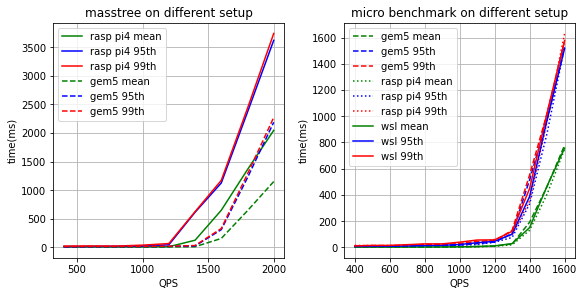

In [88]:
plt.rcParams['figure.figsize'] = [8,4]
fig, (ax00,ax01) = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
bin_range=[1,2,3,4,5,6,7,8]

masstree_dir = "/home/zohan/tailbench/results/masstree-2-gem5-mix"
masstree_qps = ("400","600","800","1000","1200","1400","1600","1800","2000")
masstree_data = combineTailFolder(masstree_dir,masstree_qps,bin_range)
# print(np.array2string(masstree_data[:,:], separator=','))
masstree_labels = list(int(i) for i in masstree_qps)
ax00.plot(masstree_labels, masstree_data[0], '-', color='g', label='rasp pi4 mean')
ax00.plot(masstree_labels, masstree_data[1], '-', color='b', label='rasp pi4 95th')
ax00.plot(masstree_labels, masstree_data[2], '-', color='r',  label='rasp pi4 99th')

# ax01.plot(masstree_labels, masstree_data[3], ':', color='g', label='rasp pi mean')
# ax01.plot(masstree_labels, masstree_data[6], ':', color='b', label='rasp pi 95th')
# ax01.plot(masstree_labels, masstree_data[7], ':', color='r',  label='rasp pi 99th')

gem5_masstree_long_qps=("400","600","800","1000","1200","1400","1600","1800","2000")
gem5_masstree_long_labels = list(int(i) for i in gem5_masstree_long_qps)
gem5_masstree_long_data=[[   1.096,   1.349,   1.789,   2.498,   3.897,   7.754, 153.211, 639.182,1149.495],
 [   4.724,   7.241,   9.772,  11.261,  13.912,  21.064, 307.615,1218.644,2188.783],
 [  10.807,  11.974,  12.958,  13.872,  17.36 ,  28.726, 326.825,1282.408,2273.179],
 [   0.551,   0.557,   0.564,   0.569,   0.573,   0.575,   0.567,   0.564,   0.564],
 [   0.65 ,   0.67 ,   0.684,   0.695,   0.703,   0.704,   0.753,   0.757,   0.758],
 [   0.764,   0.798,   0.815,   0.832,   0.845,   0.845,   0.838,   0.832,   0.834],
 [   0.608,   0.622,   0.635,   0.642,   0.647,   0.647,   0.713,   0.728,   0.729],
 [   0.647,   0.668,   0.691,   0.708,   0.736,   0.746,   0.756,   0.761,   0.762]]
# gem5_masstree_long_data=[[   1.096,   1.349,   1.789,   2.498,   3.897,   7.754, 153.211, 639.182,1149.495,1666.067,  2309.205],
#  [   4.724,   7.241,   9.772,  11.261,  13.912,  21.064, 307.615,1218.644,2188.783,3180.937,  4469.452],
#  [  10.807,  11.974,  12.958,  13.872,  17.36 ,  28.726, 326.825,1282.408,2273.179,3268.768,  4932.066],
#  [   0.551,   0.557,   0.564,   0.569,   0.573,   0.575,   0.567,   0.564,   0.564,   0.563,     0.564],
#  [   0.65 ,   0.67 ,   0.684,   0.695,   0.703,   0.704,   0.753,   0.757,   0.758,   0.757,     0.757],
#  [   0.764,   0.798,   0.815,   0.832,   0.845,   0.845,   0.838,   0.832,   0.834,   0.834,     0.835],
#  [   0.608,   0.622,   0.635,   0.642,   0.647,   0.647,   0.713,   0.728,   0.729,   0.729,     0.728],
#  [   0.647,   0.668,   0.691,   0.708,   0.736,   0.746,   0.756,   0.761,   0.762,   0.761,     0.761]]

ax00.plot(gem5_masstree_long_labels, gem5_masstree_long_data[0], '--', color='g', label='gem5 mean')
ax00.plot(gem5_masstree_long_labels, gem5_masstree_long_data[1], '--', color='b', label='gem5 95th')
ax00.plot(gem5_masstree_long_labels, gem5_masstree_long_data[2], '--', color='r', label='gem5 99th')

# ax01.plot(gem5_masstree_long_labels, gem5_masstree_long_data[3], '--', color='g', label='gem5_o3_config_long pi mean')
# ax01.plot(gem5_masstree_long_labels, gem5_masstree_long_data[6], '--', color='b', label='gem5_o3_config_long pi 95th')
# ax01.plot(gem5_masstree_long_labels, gem5_masstree_long_data[7], '--', color='r',  label='gem5_o3_config_long pi 99th')


micromasstree_gem5_qps=("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
micromasstree_gem5_labels = list(int(i) for i in micromasstree_gem5_qps)
micromasstree_gem5_data=[[   1.667,   1.783,   1.934,   2.173,   2.621,   3.098,   3.88 ,   5.769,   9.736,  25.503, 191.539, 463.703, 778.251],
 [   6.554,   7.364,   7.692,   9.098,  12.225,  13.741,  17.882,  27.973,  40.184, 105.812, 514.689, 973.133,1524.782],
 [  11.354,  14.115,  13.118,  16.202,  22.361,  21.991,  28.457,  45.349,  50.787, 129.394, 552.097,1021.58 ,1571.02 ],
 [   1.427,   1.42 ,   1.429,   1.444,   1.455,   1.459,   1.462,   1.482,   1.49 ,   1.468,   1.476,   1.482,   1.489],
 [   6.082,   6.063,   5.973,   5.935,   6.179,   6.062,   6.128,   6.129,   6.423,   6.026,   6.141,   6.277,   6.229],
 [  10.217,  10.242,   9.693,   9.346,  10.565,   9.903,  10.23 ,  10.016,  11.586,   9.609,  10.177,  10.808,  10.52 ],
 [   4.566,   4.528,   4.615,   4.681,   4.684,   4.731,   4.719,   4.803,   4.776,   4.791,   4.784,   4.784,   4.828],
 [   5.508,   5.495,   5.499,   5.507,   5.535,   5.537,   5.545,   5.573,   5.57 ,   5.559,   5.561,   5.592,   5.57 ]]

ax01.plot(micromasstree_gem5_labels, micromasstree_gem5_data[0], '--', color='g', label='gem5 mean')
ax01.plot(micromasstree_gem5_labels, micromasstree_gem5_data[1], '--', color='b', label='gem5 95th')
ax01.plot(micromasstree_gem5_labels, micromasstree_gem5_data[2], '--', color='r', label='gem5 99th')

micromasstree_pi4_qps=("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
micromasstree_pi4_labels = list(int(i) for i in micromasstree_pi4_qps)
micromasstree_pi4_data=[[    1.727,    1.806,    1.922,    2.174,    2.603,    2.966,    3.784,    5.067,    8.514,   18.818,  130.048,  405.85 ,  748.988],
 [    7.357,    7.22 ,    7.611,    8.717,   11.845,   13.006,   16.064,   21.868,   39.335,   75.241,  331.145,  870.853, 1530.81 ],
 [   14.951,   12.955,   13.373,   15.349,   21.699,   21.12 ,   24.231,   32.318,   60.165,   94.768,  353.181,  959.766, 1630.948],
 [    1.432,    1.434,    1.435,    1.45 ,    1.457,    1.454,    1.472,    1.472,    1.465,    1.465,    1.468,    1.467,    1.479],
 [    6.322,    6.086,    6.064,    6.046,    6.165,    6.116,    6.158,    6.114,    6.105,    6.056,    6.173,    6.021,    6.22 ],
 [   11.56 ,   10.157,   10.072,    9.914,   10.455,   10.244,   10.281,   10.081,   10.044,    9.797,   10.362,    9.56 ,   10.49 ],
 [    4.527,    4.617,    4.616,    4.697,    4.698,    4.695,    4.768,    4.778,    4.759,    4.761,    4.78 ,    4.792,    4.808],
 [    5.537,    5.543,    5.543,    5.511,    5.535,    5.54 ,    5.565,    5.545,    5.544,    5.557,    5.547,    5.563,    5.571]]

ax01.plot(micromasstree_pi4_labels, micromasstree_pi4_data[0], ':', color='g', label='rasp pi4 mean')
ax01.plot(micromasstree_pi4_labels, micromasstree_pi4_data[1], ':', color='b', label='rasp pi4 95th')
ax01.plot(micromasstree_pi4_labels, micromasstree_pi4_data[2], ':', color='r', label='rasp pi4 99th')

micromasstree_dir = "/home/zohan/microbench/result-micromasstree-2-test"
micromasstree_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
micromasstree_data = combineMicroFolder(micromasstree_dir,micromasstree_qps,bin_range)
micromasstreelabels = list(int(i) for i in micromasstree_qps)

ax01.plot(micromasstreelabels, micromasstree_data[0], '-', color='g', label='wsl mean')
ax01.plot(micromasstreelabels, micromasstree_data[1], '-', color='b', label='wsl 95th')
ax01.plot(micromasstreelabels, micromasstree_data[2], '-', color='r', label='wsl 99th')

ax00.legend(loc='upper left')
ax01.legend(loc='upper left')

# ax00.set_xlim(350, 1650)
# ax00.set_ylim(-25, 1700)
# ax01.set_ylim(0.5, 1.0)

# ax01.set_xlim(350, 1650)
# ax01.set_ylim(-25, 1700)

ax00.set_ylabel('time(ms)')
ax00.set_xlabel('QPS')
ax00.set_title('masstree on different setup')

ax01.set_ylabel('time(ms)')
ax01.set_xlabel('QPS')
ax01.set_title('micro benchmark on different setup')

ax00.grid(True)
ax01.grid(True)
plt.show()

In [7]:
plt.rcParams['figure.figsize'] = [8, 4]
fig, (ax00,ax01) = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
bin_range=[1,2,3,4,5,6,7,8]

# masstree_dir = "/home/zohan/tailbench/results/masstree-2-checking"
masstree_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run10/"
# masstree_qps = ("400","600","800","1000","1200","1400","1600")
masstree_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_data = combineTailFolder(masstree_dir,masstree_qps,bin_range)
# print(np.array2string(masstree_data[:,:], separator=','))
masstreelabels = list(int(i) for i in masstree_qps)

# micromasstree_dir = "/home/zohan/microbench/result-dist/38000-2-900-600"
# micromasstree_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500")
# micromasstree_data = combineMicroFolder(micromasstree_dir,micromasstree_qps)
# micromasstreelabels = list(int(i) for i in micromasstree_qps)
# print(np.array2string(microbench_data[:,:], separator=','))
micromasstree_dir = "/home/zohan/microbench/result-micromasstree-2-test"
micromasstree_qps = ("400","600","800","1000","1200","1400","1600")
micromasstree_data = combineMicroFolder(micromasstree_dir,micromasstree_qps,bin_range)
micromasstreelabels = list(int(i) for i in micromasstree_qps)

ax00.plot(masstreelabels, masstree_data[0], '--', color='g', label='masstree mean')
ax00.plot(masstreelabels, masstree_data[1], '--', color='b', label='masstree 95th')
ax00.plot(masstreelabels, masstree_data[2], '--', color='r',  label='masstree 99th')

ax00.plot(micromasstreelabels, micromasstree_data[0], 'o-', color='g', label='micromasstree mean')
ax00.plot(micromasstreelabels, micromasstree_data[1], 'o-', color='b', label='micromasstree 95th')
ax00.plot(micromasstreelabels, micromasstree_data[2], 'o-', color='r', label='micromasstree 99th')


sphinx_dir = "/home/zohan/tailbench/results/sphinx-2"
# sphinx_qps = ("0.1","0.2","0.4","0.6","0.8","1.0")
sphinx_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
sphinx_data = combineTailFolder(sphinx_dir,sphinx_qps,bin_range)
# print(np.array2string(sphinx_data[:,:], separator=','))
sphinxlabels = list(float(i) for i in sphinx_qps)

microsphinx_dir = "/home/zohan/microbench/result-microsphinx-2"
# microsphinx_qps = ("0.1","0.2","0.4","0.6","0.8","1.0")
microsphinx_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
microsphinx_data = combineMicroFolder(microsphinx_dir,microsphinx_qps,bin_range)
microsphinxlabels = list(float(i) for i in microsphinx_qps)
# print(np.array2string(microsphinx_data[:,:], separator=','))

ax01.plot(sphinxlabels, sphinx_data[0], '--', color='g', label='sphinx mean')
ax01.plot(sphinxlabels, sphinx_data[1], '--', color='b', label='sphinx mean')
ax01.plot(sphinxlabels, sphinx_data[2], '--', color='r',  label='sphinx mean')

ax01.plot(microsphinxlabels, microsphinx_data[0], 'o-', color='g', label='microsphinx mean')
ax01.plot(microsphinxlabels, microsphinx_data[1], 'o-', color='b', label='microsphinx mean')
ax01.plot(microsphinxlabels, microsphinx_data[2], 'o-', color='r', label='microsphinx mean')

ax00.legend(loc='upper left')
ax01.legend(loc='upper left')

ax00.set_ylabel('time(ms)')
ax00.set_xlabel('QPS')
ax00.set_title('masstree vs micromasstree')
ax01.set_ylabel('time(ms)')
ax01.set_xlabel('QPS')
ax01.set_title('sphinx vs microsphinx')

ax00.grid(True)
ax01.grid(True)
plt.show()

ValueError: invalid literal for int() with base 10: '0.1'

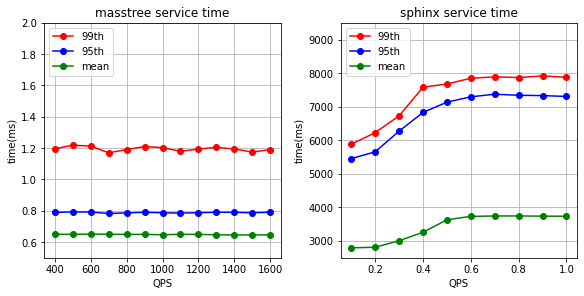

In [199]:
plt.rcParams['figure.figsize'] = [8, 4]
fig, ax = plt.subplots(ncols=2, nrows=1, constrained_layout=True)

bin_range=[1,2,3,4,5,6,7,8]
masstree_dir = "/home/zohan/tailbench/results/masstree-2-wt30-wu15-run5-control"
masstree_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_data = combineTailFolder(masstree_dir,masstree_qps,bin_range)
# print(np.array2string(masstree_data[:,:], separator=','))
masstreelabels = list(int(i) for i in masstree_qps)

ax[0].plot(masstreelabels, masstree_data[5], 'o-', color='r',  label='99th')
ax[0].plot(masstreelabels, masstree_data[4], 'o-', color='b', label='95th')
ax[0].plot(masstreelabels, masstree_data[3], 'o-', color='g', label='mean')


sphinx_dir = "/home/zohan/tailbench/results/sphinx-2"
sphinx_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
sphinx_data = combineTailFolder(sphinx_dir,sphinx_qps,bin_range)
# print(np.array2string(sphinx_data[:,:], separator=','))
sphinxlabels = list(float(i) for i in sphinx_qps)

ax[1].plot(sphinxlabels, sphinx_data[5], 'o-', color='r',  label='99th')
ax[1].plot(sphinxlabels, sphinx_data[4], 'o-', color='b', label='95th')
ax[1].plot(sphinxlabels, sphinx_data[3], 'o-', color='g', label='mean')

ax[0].legend(loc='upper left')
ax[1].legend(loc='upper left')

# ax[0].set_ylim(0.5,2.0)
ax[0].set_ylim(0.5,2.0)
ax[0].set_ylabel('time(ms)')
ax[0].set_xlabel('QPS')
ax[0].set_title('masstree service time')

ax[1].set_ylim(2500,9500)
ax[1].set_ylabel('time(ms)')
ax[1].set_xlabel('QPS')
ax[1].set_title('sphinx service time')
#
# ax[0].grid(True)
ax[0].grid(True)
ax[1].grid(True)
plt.show()

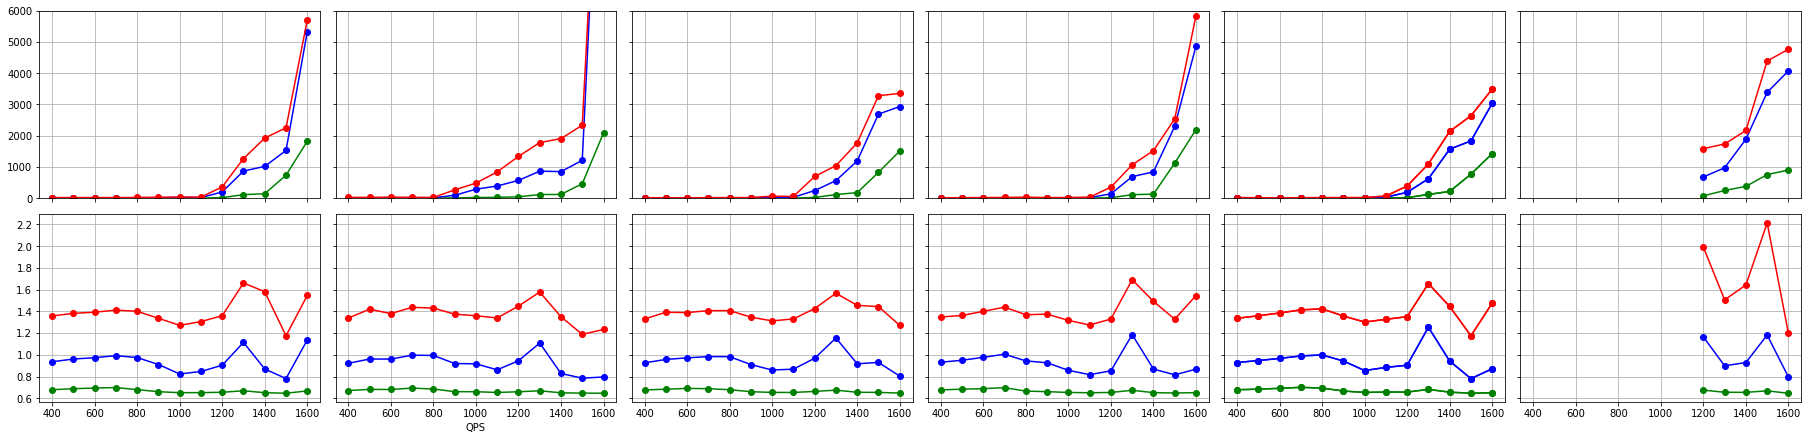

In [200]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.loc'] = "best"
# plt.rcParams['legend(loc='upper left')'] = 
fig, ax = plt.subplots(ncols=6, nrows=2, constrained_layout=True, sharex='all', sharey='row')

# for idx in [1,2,3,4,5,6,7,8]:
# for idx in [6,7,8,]:

bin_range=[1,2,3,4,5,6,7,8]
# bin_range=[7,8]

masstree_olddir = "/home/zohan/tailbench/results/masstree-2"
masstree_oldqps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
# masstree_oldqps = ("400","600","800","1000","1200","1400","1600")
masstree_olddata = combineTailFolder(masstree_olddir,masstree_oldqps,bin_range)
# print(np.array2string(masstree_olddata[:,:], separator=','))
masstreelabels_old = list(int(i) for i in masstree_oldqps)

ax[0,0].plot(masstreelabels_old, masstree_olddata[0], 'o-', color='g', label='masstree mean')
ax[0,0].plot(masstreelabels_old, masstree_olddata[1], 'o-', color='b', label='masstree 95th')
ax[0,0].plot(masstreelabels_old, masstree_olddata[2], 'o-', color='r',  label='masstree 99th')
ax[1,0].plot(masstreelabels_old, masstree_olddata[3], 'o-', color='g', label='masstree mean')
ax[1,0].plot(masstreelabels_old, masstree_olddata[4], 'o-', color='b', label='masstree 95th')
ax[1,0].plot(masstreelabels_old, masstree_olddata[5], 'o-', color='r',  label='masstree 99th')

masstree_dir = "/home/zohan/tailbench/results/masstree-2-checking"
masstree_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_data = combineTailFolder(masstree_dir,masstree_qps,bin_range)
# print(np.array2string(masstree_data[:,:], separator=','))
masstreelabels = list(int(i) for i in masstree_qps)
ax[0,1].plot(masstreelabels, masstree_data[0], 'o-', color='g', label='masstree mean')
ax[0,1].plot(masstreelabels, masstree_data[1], 'o-', color='b', label='masstree 95th')
ax[0,1].plot(masstreelabels, masstree_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,1].plot(masstreelabels, masstree_data[3], 'o-', color='g', label='masstree mean')
ax[1,1].plot(masstreelabels, masstree_data[4], 'o-', color='b', label='masstree 95th')
ax[1,1].plot(masstreelabels, masstree_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt10_wu10_run10_dir = "/home/zohan/tailbench/results/masstree-2-waiting10"
masstree_wt10_wu10_run10_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_wt10_wu10_run10_data = combineTailFolder(masstree_wt10_wu10_run10_dir,masstree_wt10_wu10_run10_qps,bin_range)
# print(np.array2string(masstree_wt10_wu10_run10_data[:,:], separator=','))
masstreelabels = list(int(i) for i in masstree_wt10_wu10_run10_qps)
ax[0,2].plot(masstreelabels, masstree_wt10_wu10_run10_data[0], 'o-', color='g', label='masstree mean')
ax[0,2].plot(masstreelabels, masstree_wt10_wu10_run10_data[1], 'o-', color='b', label='masstree 95th')
ax[0,2].plot(masstreelabels, masstree_wt10_wu10_run10_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,2].plot(masstreelabels, masstree_wt10_wu10_run10_data[3], 'o-', color='g', label='masstree mean')
ax[1,2].plot(masstreelabels, masstree_wt10_wu10_run10_data[4], 'o-', color='b', label='masstree 95th')
ax[1,2].plot(masstreelabels, masstree_wt10_wu10_run10_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt10_wu10_run30_dir = "/home/zohan/tailbench/results/masstree-2-waiting10-30"
masstree_wt10_wu10_run30_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_wt10_wu10_run30_data = combineTailFolder(masstree_wt10_wu10_run30_dir,masstree_wt10_wu10_run30_qps,bin_range)
masstreelabels = list(int(i) for i in masstree_wt10_wu10_run30_qps)
ax[0,3].plot(masstreelabels, masstree_wt10_wu10_run30_data[0], 'o-', color='g', label='masstree mean')
ax[0,3].plot(masstreelabels, masstree_wt10_wu10_run30_data[1], 'o-', color='b', label='masstree 95th')
ax[0,3].plot(masstreelabels, masstree_wt10_wu10_run30_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,3].plot(masstreelabels, masstree_wt10_wu10_run30_data[3], 'o-', color='g', label='masstree mean')
ax[1,3].plot(masstreelabels, masstree_wt10_wu10_run30_data[4], 'o-', color='b', label='masstree 95th')
ax[1,3].plot(masstreelabels, masstree_wt10_wu10_run30_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt20_wu10_run20_dir = "/home/zohan/tailbench/results/masstree-2-wt20-wu10-run20"
masstree_wt20_wu10_run20_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_wt20_wu10_run20_data = combineTailFolder(masstree_wt20_wu10_run20_dir,masstree_wt20_wu10_run20_qps,bin_range)
masstreelabels = list(int(i) for i in masstree_wt20_wu10_run20_qps)
ax[0,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[0], 'o-', color='g', label='masstree mean')
ax[0,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[1], 'o-', color='b', label='masstree 95th')
ax[0,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[3], 'o-', color='g', label='masstree mean')
ax[1,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[4], 'o-', color='b', label='masstree 95th')
ax[1,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt20_wu10_run20_dir = "/home/zohan/tailbench/results/masstree-2-wt20-wu10-run20"
masstree_wt20_wu10_run20_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_wt20_wu10_run20_data = combineTailFolder(masstree_wt20_wu10_run20_dir,masstree_wt20_wu10_run20_qps,bin_range)
masstreelabels = list(int(i) for i in masstree_wt20_wu10_run20_qps)
ax[0,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[0], 'o-', color='g', label='masstree mean')
ax[0,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[1], 'o-', color='b', label='masstree 95th')
ax[0,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[3], 'o-', color='g', label='masstree mean')
ax[1,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[4], 'o-', color='b', label='masstree 95th')
ax[1,4].plot(masstreelabels, masstree_wt20_wu10_run20_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt10_wu10_run20_disorder_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run5"
masstree_wt10_wu10_run20_disorder_qps = ("1200","1300","1400","1500","1600")
masstree_wt10_wu10_run20_disorder_data = combineTailFolder(masstree_wt10_wu10_run20_disorder_dir,masstree_wt10_wu10_run20_disorder_qps,bin_range)
masstreelabels = list(int(i) for i in masstree_wt10_wu10_run20_disorder_qps)
ax[0,5].plot(masstreelabels, masstree_wt10_wu10_run20_disorder_data[0], 'o-', color='g', label='masstree mean')
ax[0,5].plot(masstreelabels, masstree_wt10_wu10_run20_disorder_data[1], 'o-', color='b', label='masstree 95th')
ax[0,5].plot(masstreelabels, masstree_wt10_wu10_run20_disorder_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,5].plot(masstreelabels, masstree_wt10_wu10_run20_disorder_data[3], 'o-', color='g', label='masstree mean')
ax[1,5].plot(masstreelabels, masstree_wt10_wu10_run20_disorder_data[4], 'o-', color='b', label='masstree 95th')
ax[1,5].plot(masstreelabels, masstree_wt10_wu10_run20_disorder_data[5], 'o-', color='r',  label='masstree 99th')



# ax[1,0].set_ylim(0.5,2.0)
ax[0,0].set_ylim(0,6000)

# ax[1,1].set_ylabel('time(ms)')
ax[1,1].set_xlabel('QPS')
# ax[1,1].set_title('masstree service time')

# ax[1,2].set_ylim(2500,9500)
# ax[1,2].set_ylabel('time(ms)')
# ax[1,2].set_xlabel('QPS')
# ax[1,2].set_title('sphinx service time')
#

plt.show()

stree-2-wt10-wu15-run5/1200/lats-11.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1200/lats-12.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1200/lats-13.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1200/lats-14.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1200/lats-15.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1300/lats-9.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1300/lats-10.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1300/lats-11.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1300/lats-12.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1300/lats-13.bin
not found in this dir : /home/zohan/tailbench/results/masstree-2-wt10-wu15-run5/1300/lat

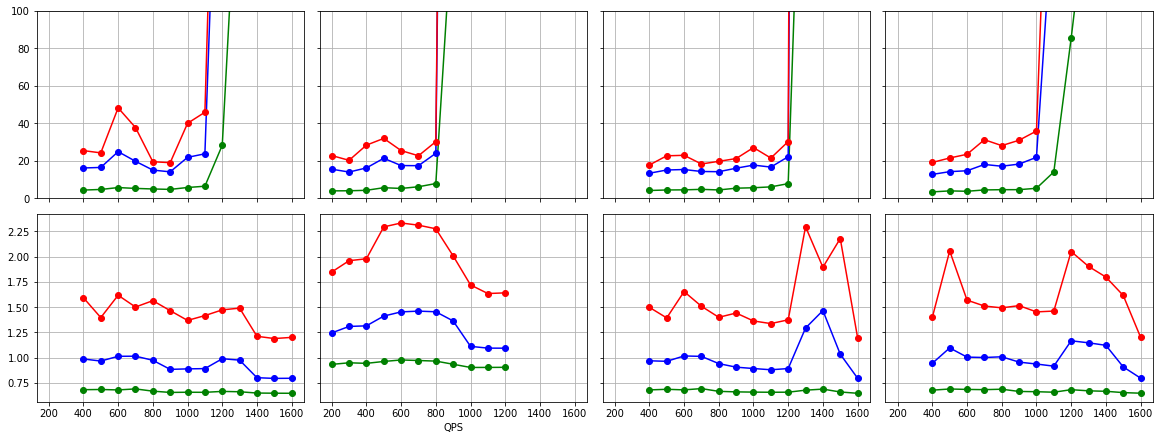

In [76]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.loc'] = "best"
# plt.rcParams['legend(loc='upper left')'] = 
fig, ax = plt.subplots(ncols=4, nrows=2, constrained_layout=True, sharex='all', sharey='row')

# for idx in [1,2,3,4,5,6,7,8]:
# for idx in [6,7,8,]:

bin_range=[3,4,5,6,7,8,9,10,11,12,13,14,15]
# bin_range=[7,8]

masstree_wt10_wu10_run5_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run5"
masstree_wt10_wu10_run5_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
# masstree_wt10_wu10_run5_qps = ("400","600","800","1000","1200","1400","1600")
masstree_wt10_wu10_run5_data = combineTailFolder(masstree_wt10_wu10_run5_dir,masstree_wt10_wu10_run5_qps,bin_range)
# print(np.array2string(masstree_wt10_wu10_run5_data[:,:], separator=','))
masstreelabels_wt10_wu10_run5 = list(int(i) for i in masstree_wt10_wu10_run5_qps)

ax[0,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[0], 'o-', color='g', label='masstree mean')
ax[0,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[1], 'o-', color='b', label='masstree 95th')
ax[0,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[3], 'o-', color='g', label='masstree mean')
ax[1,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[4], 'o-', color='b', label='masstree 95th')
ax[1,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[5], 'o-', color='r',  label='masstree 99th')

# masstree_olddir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run5"
# masstree_oldqps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
# # masstree_oldqps = ("400","600","800","1000","1200","1400","1600")
# masstree_olddata = combineTailFolder(masstree_olddir,masstree_oldqps,bin_range)
# # print(np.array2string(masstree_olddata[:,:], separator=','))
# masstreelabels_old = list(int(i) for i in masstree_oldqps)

# ax[0,0].plot(masstreelabels_old, masstree_olddata[0], 'o-', color='g', label='masstree mean')
# ax[0,0].plot(masstreelabels_old, masstree_olddata[1], 'o-', color='b', label='masstree 95th')
# ax[0,0].plot(masstreelabels_old, masstree_olddata[2], 'o-', color='r',  label='masstree 99th')
# ax[1,0].plot(masstreelabels_old, masstree_olddata[3], 'o-', color='g', label='masstree mean')
# ax[1,0].plot(masstreelabels_old, masstree_olddata[4], 'o-', color='b', label='masstree 95th')
# ax[1,0].plot(masstreelabels_old, masstree_olddata[5], 'o-', color='r',  label='masstree 99th')

masstree_wt10_wu10_run5_1G_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run5-1G"
masstree_wt10_wu10_run5_1G_qps = ("200","300","400","500","600","700","800","900","1000","1100","1200")
masstree_wt10_wu10_run5_1G_data = combineTailFolder(masstree_wt10_wu10_run5_1G_dir,masstree_wt10_wu10_run5_1G_qps,bin_range)
masstreelabels = list(int(i) for i in masstree_wt10_wu10_run5_1G_qps)
ax[0,1].plot(masstreelabels, masstree_wt10_wu10_run5_1G_data[0], 'o-', color='g', label='masstree mean')
ax[0,1].plot(masstreelabels, masstree_wt10_wu10_run5_1G_data[1], 'o-', color='b', label='masstree 95th')
ax[0,1].plot(masstreelabels, masstree_wt10_wu10_run5_1G_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,1].plot(masstreelabels, masstree_wt10_wu10_run5_1G_data[3], 'o-', color='g', label='masstree mean')
ax[1,1].plot(masstreelabels, masstree_wt10_wu10_run5_1G_data[4], 'o-', color='b', label='masstree 95th')
ax[1,1].plot(masstreelabels, masstree_wt10_wu10_run5_1G_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt10_wu10_run5_back_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run5-back"
masstree_wt10_wu10_run5_back_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
# masstree_wt10_wu10_run5_back_qps = ("400","600","800","1000","1200","1400","1600")
masstree_wt10_wu10_run5_back_data = combineTailFolder(masstree_wt10_wu10_run5_back_dir,masstree_wt10_wu10_run5_back_qps,bin_range)
# print(np.array2string(masstree_wt10_wu10_run5_back_data[:,:], separator=','))
masstreelabels_wt10_wu10_run5_back = list(int(i) for i in masstree_wt10_wu10_run5_back_qps)

ax[0,2].plot(masstreelabels_wt10_wu10_run5_back, masstree_wt10_wu10_run5_back_data[0], 'o-', color='g', label='masstree mean')
ax[0,2].plot(masstreelabels_wt10_wu10_run5_back, masstree_wt10_wu10_run5_back_data[1], 'o-', color='b', label='masstree 95th')
ax[0,2].plot(masstreelabels_wt10_wu10_run5_back, masstree_wt10_wu10_run5_back_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,2].plot(masstreelabels_wt10_wu10_run5_back, masstree_wt10_wu10_run5_back_data[3], 'o-', color='g', label='masstree mean')
ax[1,2].plot(masstreelabels_wt10_wu10_run5_back, masstree_wt10_wu10_run5_back_data[4], 'o-', color='b', label='masstree 95th')
ax[1,2].plot(masstreelabels_wt10_wu10_run5_back, masstree_wt10_wu10_run5_back_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt10_wu15_run10_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run10"
masstree_wt10_wu15_run10_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_wt10_wu15_run10_data = combineTailFolder(masstree_wt10_wu15_run10_dir,masstree_wt10_wu15_run10_qps,bin_range)
masstreelabels_wt10_wu15_run10 = list(int(i) for i in masstree_wt10_wu15_run10_qps)

ax[0,3].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[0], 'o-', color='g', label='masstree mean')
ax[0,3].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[1], 'o-', color='b', label='masstree 95th')
ax[0,3].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,3].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[3], 'o-', color='g', label='masstree mean')
ax[1,3].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[4], 'o-', color='b', label='masstree 95th')
ax[1,3].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[5], 'o-', color='r',  label='masstree 99th')

# ax[1,0].set_ylim(0.5,2.0)
ax[0,0].set_ylim(0,100)

# ax[1,1].set_ylabel('time(ms)')
ax[1,1].set_xlabel('QPS')
# ax[1,1].set_title('masstree service time')


plt.show()

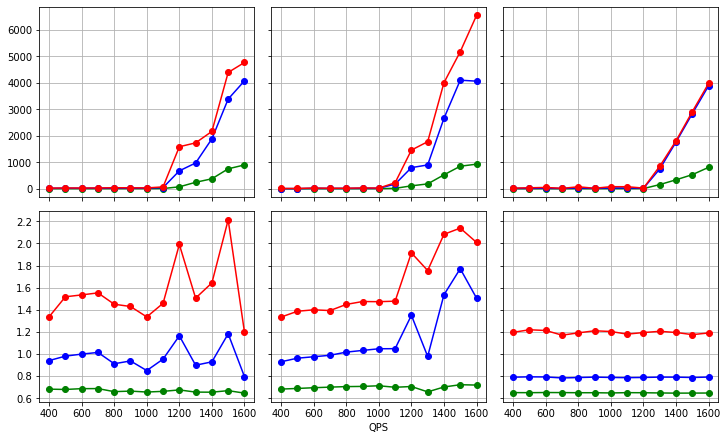

In [201]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.loc'] = "best"
# plt.rcParams['legend(loc='upper left')'] = 
fig, ax = plt.subplots(ncols=3, nrows=2, constrained_layout=True, sharex='all', sharey='row')

# for idx in [1,2,3,4,5,6,7,8]:
# for idx in [6,7,8,]:

bin_range=[1,2,3,4,5,6,7,8]
# bin_range=[7,8]

masstree_wt10_wu10_run5_dir = "/home/zohan/tailbench/results/masstree-2-wt10-wu15-run5"
masstree_wt10_wu10_run5_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
# masstree_wt10_wu10_run5_qps = ("400","600","800","1000","1200","1400","1600")
masstree_wt10_wu10_run5_data = combineTailFolder(masstree_wt10_wu10_run5_dir,masstree_wt10_wu10_run5_qps,bin_range)
# print(np.array2string(masstree_wt10_wu10_run5_data[:,:], separator=','))
masstreelabels_wt10_wu10_run5 = list(int(i) for i in masstree_wt10_wu10_run5_qps)

ax[0,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[0], 'o-', color='g', label='masstree mean')
ax[0,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[1], 'o-', color='b', label='masstree 95th')
ax[0,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[3], 'o-', color='g', label='masstree mean')
ax[1,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[4], 'o-', color='b', label='masstree 95th')
ax[1,0].plot(masstreelabels_wt10_wu10_run5, masstree_wt10_wu10_run5_data[5], 'o-', color='r',  label='masstree 99th')


masstree_wt10_wu15_run10_dir = "/home/zohan/tailbench/results/masstree-2-wt30-wu15-run5-mix"
masstree_wt10_wu15_run10_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_wt10_wu15_run10_data = combineTailFolder(masstree_wt10_wu15_run10_dir,masstree_wt10_wu15_run10_qps,bin_range)
masstreelabels_wt10_wu15_run10 = list(int(i) for i in masstree_wt10_wu15_run10_qps)

ax[0,1].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[0], 'o-', color='g', label='masstree mean')
ax[0,1].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[1], 'o-', color='b', label='masstree 95th')
ax[0,1].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,1].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[3], 'o-', color='g', label='masstree mean')
ax[1,1].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[4], 'o-', color='b', label='masstree 95th')
ax[1,1].plot(masstreelabels_wt10_wu15_run10, masstree_wt10_wu15_run10_data[5], 'o-', color='r',  label='masstree 99th')

masstree_wt30_wu15_run5_dir = "/home/zohan/tailbench/results/masstree-2-wt30-wu15-run5-control/"
masstree_wt30_wu15_run5_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
masstree_wt30_wu15_run5_data = combineTailFolder(masstree_wt30_wu15_run5_dir,masstree_wt30_wu15_run5_qps,bin_range)
masstreelabels_wt30_wu15_run5 = list(int(i) for i in masstree_wt30_wu15_run5_qps)

ax[0,2].plot(masstreelabels_wt30_wu15_run5, masstree_wt30_wu15_run5_data[0], 'o-', color='g', label='masstree mean')
ax[0,2].plot(masstreelabels_wt30_wu15_run5, masstree_wt30_wu15_run5_data[1], 'o-', color='b', label='masstree 95th')
ax[0,2].plot(masstreelabels_wt30_wu15_run5, masstree_wt30_wu15_run5_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,2].plot(masstreelabels_wt30_wu15_run5, masstree_wt30_wu15_run5_data[3], 'o-', color='g', label='masstree mean')
ax[1,2].plot(masstreelabels_wt30_wu15_run5, masstree_wt30_wu15_run5_data[4], 'o-', color='b', label='masstree 95th')
ax[1,2].plot(masstreelabels_wt30_wu15_run5, masstree_wt30_wu15_run5_data[5], 'o-', color='r',  label='masstree 99th')
# ax[1,0].set_ylim(0.5,2.0)
# ax[0,0].set_ylim(0,100)

# ax[1,1].set_ylabel('time(ms)')
ax[1,1].set_xlabel('QPS')
# ax[1,1].set_title('masstree service time')


plt.show()

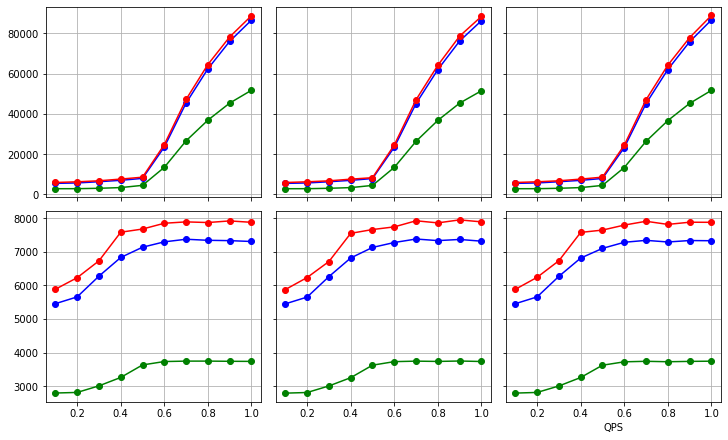

In [176]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.loc'] = "best"
# plt.rcParams['legend(loc='upper left')'] = 
fig, ax = plt.subplots(ncols=3, nrows=2, constrained_layout=True, sharex='all', sharey='row')

# for idx in [1,2,3,4,5,6,7,8]:
# for idx in [6,7,8,]:

bin_range=[1,2,3,4,5,6,7,8]
# bin_range=[7,8]

sphinx_normal_dir = "/home/zohan/tailbench/results/sphinx-2"
sphinx_normal_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
sphinx_normal_data = combineTailFolder(sphinx_normal_dir,sphinx_normal_qps,bin_range)
# print(np.array2string(sphinx_normal_data[:,:], separator=','))
sphinx_labels = list(float(i) for i in sphinx_normal_qps)

ax[0,0].plot(sphinx_labels, sphinx_normal_data[0], 'o-', color='g', label='masstree mean')
ax[0,0].plot(sphinx_labels, sphinx_normal_data[1], 'o-', color='b', label='masstree 95th')
ax[0,0].plot(sphinx_labels, sphinx_normal_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,0].plot(sphinx_labels, sphinx_normal_data[3], 'o-', color='g', label='masstree mean')
ax[1,0].plot(sphinx_labels, sphinx_normal_data[4], 'o-', color='b', label='masstree 95th')
ax[1,0].plot(sphinx_labels, sphinx_normal_data[5], 'o-', color='r',  label='masstree 99th')


sphinx_separate_dir = "/home/zohan/tailbench/results/sphinx-2-separate"
sphinx_separate_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
sphinx_separate_data = combineTailFolder(sphinx_separate_dir,sphinx_separate_qps,bin_range)
# print(np.array2string(sphinx_separate_data[:,:], separator=','))
sphinx_labels = list(float(i) for i in sphinx_separate_qps)

ax[0,1].plot(sphinx_labels, sphinx_separate_data[0], 'o-', color='g', label='masstree mean')
ax[0,1].plot(sphinx_labels, sphinx_separate_data[1], 'o-', color='b', label='masstree 95th')
ax[0,1].plot(sphinx_labels, sphinx_separate_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,1].plot(sphinx_labels, sphinx_separate_data[3], 'o-', color='g', label='masstree mean')
ax[1,1].plot(sphinx_labels, sphinx_separate_data[4], 'o-', color='b', label='masstree 95th')
ax[1,1].plot(sphinx_labels, sphinx_separate_data[5], 'o-', color='r',  label='masstree 99th')

sphinx_mix_dir = "/home/zohan/tailbench/results/sphinx-2-mix"
sphinx_mix_qps = ("0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0")
sphinx_mix_data = combineTailFolder(sphinx_mix_dir,sphinx_mix_qps,bin_range)
# print(np.array2string(sphinx_mix_data[:,:], separator=','))
sphinx_labels = list(float(i) for i in sphinx_mix_qps)

ax[0,2].plot(sphinx_labels, sphinx_mix_data[0], 'o-', color='g', label='masstree mean')
ax[0,2].plot(sphinx_labels, sphinx_mix_data[1], 'o-', color='b', label='masstree 95th')
ax[0,2].plot(sphinx_labels, sphinx_mix_data[2], 'o-', color='r',  label='masstree 99th')
ax[1,2].plot(sphinx_labels, sphinx_mix_data[3], 'o-', color='g', label='masstree mean')
ax[1,2].plot(sphinx_labels, sphinx_mix_data[4], 'o-', color='b', label='masstree 95th')
ax[1,2].plot(sphinx_labels, sphinx_mix_data[5], 'o-', color='r',  label='masstree 99th')
# ax[1,1].set_ylabel('time(ms)')
ax[1,2].set_xlabel('QPS')
# ax[1,1].set_title('masstree service time')


plt.show()

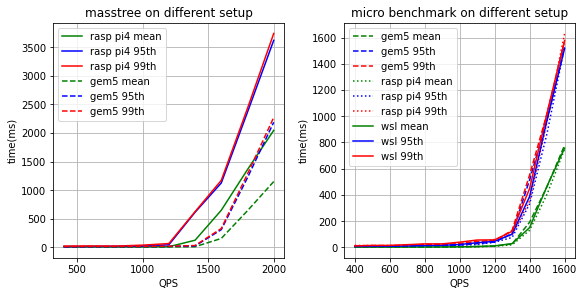

In [5]:
plt.rcParams['figure.figsize'] = [8,4]
fig, (ax00,ax01) = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
bin_range=[1,2,3,4,5,6,7,8]

masstree_dir = "/home/zohan/tailbench/results/masstree-2-gem5-mix"
masstree_qps = ("400","600","800","1000","1200","1400","1600","1800","2000")
masstree_data = combineTailFolder(masstree_dir,masstree_qps,bin_range)
# print(np.array2string(masstree_data[:,:], separator=','))
masstree_labels = list(int(i) for i in masstree_qps)
ax00.plot(masstree_labels, masstree_data[0], '-', color='g', label='rasp pi4 mean')
ax00.plot(masstree_labels, masstree_data[1], '-', color='b', label='rasp pi4 95th')
ax00.plot(masstree_labels, masstree_data[2], '-', color='r',  label='rasp pi4 99th')

# ax01.plot(masstree_labels, masstree_data[3], ':', color='g', label='rasp pi mean')
# ax01.plot(masstree_labels, masstree_data[6], ':', color='b', label='rasp pi 95th')
# ax01.plot(masstree_labels, masstree_data[7], ':', color='r',  label='rasp pi 99th')

gem5_masstree_long_qps=("400","600","800","1000","1200","1400","1600","1800","2000")
gem5_masstree_long_labels = list(int(i) for i in gem5_masstree_long_qps)
gem5_masstree_long_data=[[   1.096,   1.349,   1.789,   2.498,   3.897,   7.754, 153.211, 639.182,1149.495],
 [   4.724,   7.241,   9.772,  11.261,  13.912,  21.064, 307.615,1218.644,2188.783],
 [  10.807,  11.974,  12.958,  13.872,  17.36 ,  28.726, 326.825,1282.408,2273.179],
 [   0.551,   0.557,   0.564,   0.569,   0.573,   0.575,   0.567,   0.564,   0.564],
 [   0.65 ,   0.67 ,   0.684,   0.695,   0.703,   0.704,   0.753,   0.757,   0.758],
 [   0.764,   0.798,   0.815,   0.832,   0.845,   0.845,   0.838,   0.832,   0.834],
 [   0.608,   0.622,   0.635,   0.642,   0.647,   0.647,   0.713,   0.728,   0.729],
 [   0.647,   0.668,   0.691,   0.708,   0.736,   0.746,   0.756,   0.761,   0.762]]
# gem5_masstree_long_data=[[   1.096,   1.349,   1.789,   2.498,   3.897,   7.754, 153.211, 639.182,1149.495,1666.067,  2309.205],
#  [   4.724,   7.241,   9.772,  11.261,  13.912,  21.064, 307.615,1218.644,2188.783,3180.937,  4469.452],
#  [  10.807,  11.974,  12.958,  13.872,  17.36 ,  28.726, 326.825,1282.408,2273.179,3268.768,  4932.066],
#  [   0.551,   0.557,   0.564,   0.569,   0.573,   0.575,   0.567,   0.564,   0.564,   0.563,     0.564],
#  [   0.65 ,   0.67 ,   0.684,   0.695,   0.703,   0.704,   0.753,   0.757,   0.758,   0.757,     0.757],
#  [   0.764,   0.798,   0.815,   0.832,   0.845,   0.845,   0.838,   0.832,   0.834,   0.834,     0.835],
#  [   0.608,   0.622,   0.635,   0.642,   0.647,   0.647,   0.713,   0.728,   0.729,   0.729,     0.728],
#  [   0.647,   0.668,   0.691,   0.708,   0.736,   0.746,   0.756,   0.761,   0.762,   0.761,     0.761]]

ax00.plot(gem5_masstree_long_labels, gem5_masstree_long_data[0], '--', color='g', label='gem5 mean')
ax00.plot(gem5_masstree_long_labels, gem5_masstree_long_data[1], '--', color='b', label='gem5 95th')
ax00.plot(gem5_masstree_long_labels, gem5_masstree_long_data[2], '--', color='r', label='gem5 99th')

# ax01.plot(gem5_masstree_long_labels, gem5_masstree_long_data[3], '--', color='g', label='gem5_o3_config_long pi mean')
# ax01.plot(gem5_masstree_long_labels, gem5_masstree_long_data[6], '--', color='b', label='gem5_o3_config_long pi 95th')
# ax01.plot(gem5_masstree_long_labels, gem5_masstree_long_data[7], '--', color='r',  label='gem5_o3_config_long pi 99th')


micromasstree_gem5_qps=("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
micromasstree_gem5_labels = list(int(i) for i in micromasstree_gem5_qps)
micromasstree_gem5_data=[[   1.667,   1.783,   1.934,   2.173,   2.621,   3.098,   3.88 ,   5.769,   9.736,  25.503, 191.539, 463.703, 778.251],
 [   6.554,   7.364,   7.692,   9.098,  12.225,  13.741,  17.882,  27.973,  40.184, 105.812, 514.689, 973.133,1524.782],
 [  11.354,  14.115,  13.118,  16.202,  22.361,  21.991,  28.457,  45.349,  50.787, 129.394, 552.097,1021.58 ,1571.02 ],
 [   1.427,   1.42 ,   1.429,   1.444,   1.455,   1.459,   1.462,   1.482,   1.49 ,   1.468,   1.476,   1.482,   1.489],
 [   6.082,   6.063,   5.973,   5.935,   6.179,   6.062,   6.128,   6.129,   6.423,   6.026,   6.141,   6.277,   6.229],
 [  10.217,  10.242,   9.693,   9.346,  10.565,   9.903,  10.23 ,  10.016,  11.586,   9.609,  10.177,  10.808,  10.52 ],
 [   4.566,   4.528,   4.615,   4.681,   4.684,   4.731,   4.719,   4.803,   4.776,   4.791,   4.784,   4.784,   4.828],
 [   5.508,   5.495,   5.499,   5.507,   5.535,   5.537,   5.545,   5.573,   5.57 ,   5.559,   5.561,   5.592,   5.57 ]]

ax01.plot(micromasstree_gem5_labels, micromasstree_gem5_data[0], '--', color='g', label='gem5 mean')
ax01.plot(micromasstree_gem5_labels, micromasstree_gem5_data[1], '--', color='b', label='gem5 95th')
ax01.plot(micromasstree_gem5_labels, micromasstree_gem5_data[2], '--', color='r', label='gem5 99th')

micromasstree_pi4_qps=("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
micromasstree_pi4_labels = list(int(i) for i in micromasstree_pi4_qps)
micromasstree_pi4_data=[[    1.727,    1.806,    1.922,    2.174,    2.603,    2.966,    3.784,    5.067,    8.514,   18.818,  130.048,  405.85 ,  748.988],
 [    7.357,    7.22 ,    7.611,    8.717,   11.845,   13.006,   16.064,   21.868,   39.335,   75.241,  331.145,  870.853, 1530.81 ],
 [   14.951,   12.955,   13.373,   15.349,   21.699,   21.12 ,   24.231,   32.318,   60.165,   94.768,  353.181,  959.766, 1630.948],
 [    1.432,    1.434,    1.435,    1.45 ,    1.457,    1.454,    1.472,    1.472,    1.465,    1.465,    1.468,    1.467,    1.479],
 [    6.322,    6.086,    6.064,    6.046,    6.165,    6.116,    6.158,    6.114,    6.105,    6.056,    6.173,    6.021,    6.22 ],
 [   11.56 ,   10.157,   10.072,    9.914,   10.455,   10.244,   10.281,   10.081,   10.044,    9.797,   10.362,    9.56 ,   10.49 ],
 [    4.527,    4.617,    4.616,    4.697,    4.698,    4.695,    4.768,    4.778,    4.759,    4.761,    4.78 ,    4.792,    4.808],
 [    5.537,    5.543,    5.543,    5.511,    5.535,    5.54 ,    5.565,    5.545,    5.544,    5.557,    5.547,    5.563,    5.571]]

ax01.plot(micromasstree_pi4_labels, micromasstree_pi4_data[0], ':', color='g', label='rasp pi4 mean')
ax01.plot(micromasstree_pi4_labels, micromasstree_pi4_data[1], ':', color='b', label='rasp pi4 95th')
ax01.plot(micromasstree_pi4_labels, micromasstree_pi4_data[2], ':', color='r', label='rasp pi4 99th')

micromasstree_dir = "/home/zohan/microbench/result-micromasstree-2-test"
micromasstree_qps = ("400","500","600","700","800","900","1000","1100","1200","1300","1400","1500","1600")
micromasstree_data = combineMicroFolder(micromasstree_dir,micromasstree_qps,bin_range)
micromasstreelabels = list(int(i) for i in micromasstree_qps)

ax01.plot(micromasstreelabels, micromasstree_data[0], '-', color='g', label='wsl mean')
ax01.plot(micromasstreelabels, micromasstree_data[1], '-', color='b', label='wsl 95th')
ax01.plot(micromasstreelabels, micromasstree_data[2], '-', color='r', label='wsl 99th')

ax00.legend(loc='upper left')
ax01.legend(loc='upper left')

# ax00.set_xlim(350, 1650)
# ax00.set_ylim(-25, 1700)
# ax01.set_ylim(0.5, 1.0)

# ax01.set_xlim(350, 1650)
# ax01.set_ylim(-25, 1700)

ax00.set_ylabel('time(ms)')
ax00.set_xlabel('QPS')
ax00.set_title('masstree on different setup')

ax01.set_ylabel('time(ms)')
ax01.set_xlabel('QPS')
ax01.set_title('micro benchmark on different setup')

ax00.grid(True)
ax01.grid(True)
plt.show()